<a href="https://colab.research.google.com/github/bercik97/ds/blob/main/Projekt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Poprawne załadowanie danych ze źródła internetowego do ramki danych, z uwzględnieniem nagłówków, kodowania zbioru, separatorów itd.

- Brak miasta na literę 'K', wybrałem Amsterdam

In [2]:
# https://pandas.pydata.org/docs/reference/frame.html

import pandas as pd
import numpy as np
import scipy
import seaborn as sb
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None, 'display.max_rows', None)

amsterdam_url = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2022-12-05/data/listings.csv.gz'

df = pd.read_csv(amsterdam_url)

2. Poznanie rozmiaru zbioru danych (liczby obserwacji i liczby zmiennych, które je opisują) i oszacowanie czasochłonności procesu analizy

- 6809 rekordów, indexy od 0 do 6808
- 75 kolumn
- typy danych
- zużycie pamięci


In [3]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Columns: 75 entries, id to reviews_per_month
dtypes: float64(17), int64(23), object(35)
memory usage: 3.9+ MB


3. Wyświetlenie próbki surowych danych w celu wyrobienia sobie wyobrażenia o nich – poznania struktury danych i wstępnej oceny przydatności poszczególnych zmiennych

- wyświetlenie 5 pierwszych wierszy

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,528022,https://www.airbnb.com/rooms/528022,20221205143541,2022-12-05,city scrape,Somewhere Else,Highlights<br />*Located only 5 minutes from C...,NaN,https://a0.muscache.com/pictures/bf6fa79c-5863...,2594559,https://www.airbnb.com/users/show/2594559,Els,2012-06-10,"Amsterdam, Netherlands",NaN,within a day,87%,96%,f,https://a0.muscache.com/im/pictures/user/98c88...,https://a0.muscache.com/im/pictures/user/98c88...,Spaarndammer en Zeeheldenbuurt,1,1,"['email', 'phone']",t,t,NaN,Westerpark,NaN,52.39114,4.88846,Private room in boat,Private room,2,NaN,1.5 baths,1.0,1.0,"[""Bed linens"", ""Dishes and silverware"", ""Hange...",$100.00,2,30,2,2,30,30,2.0,30.0,NaN,t,4,16,29,212,2022-12-05,248,37,3,2016-10-06,2022-11-28,4.85,4.88,4.83,4.93,4.90,4.78,4.72,0363 9289 A94D 5C21 A579,f,1,0,1,0,3.30
1,2818,https://www.airbnb.com/rooms/2818,20221205143541,2022-12-05,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36435,4.94358,Private room in rental unit,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Books and reading material"", ""Smoke alarm"", ...",$59.00,3,28,3,3,1125,1125,3.0,1125.0,NaN,t,6,27,27,27,2022-12-05,314,29,1,2009-03-30,2022-11-06,4.89,4.93,4.99,4.97,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.88
2,20168,https://www.airbnb.com/rooms/20168,20221205143541,2022-12-05,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Netherlands",+ (Phone number hidden by Airbnb),within an hour,100%,98%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,3,5,"['email', 'phone']",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36407,4.89393,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Smoke alarm"", ""Bed linens"", ""Hangers"", ""Wifi...",$106.00,1,365,1,1,1125,1125,1.0,1125.0,NaN,t,0,0,0,0,2022-12-05,339,0,0,2010-03-02,2020-04-09,4.44,4.69,4.79,4.63,4.6

4. Weryfikacja typów poszczególnych zmiennych (całkowite, zmiennoprzecinkowe, kategoryczne porządkowe, kategoryczne nominalne, zmienne typu logicznego, daty) i ich ewentualna korekta (zamiana typu string na float, interpretacja zmiennych numerycznych jako kategorii itp.)

In [ ]:
def getNumFromBathroomText(bathroomText):
  if not isinstance(bathroomText, str):
    return bathroomText
  elif 'half' in bathroomText.lower():
    return 0.5
  return float(bathroomText.split()[0])

def convertPercentToFloat(percentValue):
  return percentValue.str.replace('%', '').astype(np.float64)

def convertPriceToFloat(priceValue):
  return priceValue.str.replace("[\$,]","", regex=True).astype(np.float64)

def convertToBoolsArr(arr):
  return arr.map({'t': True, 'f': False}).astype(bool)

def convertToDateTimeFormat(date):
  return pd.to_datetime(date, format='%Y/%m/%d')

df['bathrooms'] = df['bathrooms_text'].map(lambda bt: getNumFromBathroomText(bt))
df['host_response_rate'] = convertPercentToFloat(df['host_response_rate'])
df['host_acceptance_rate'] = convertPercentToFloat(df['host_acceptance_rate'])
df['price'] = convertPriceToFloat(df['price'])

df['source'] = df['source'].astype('category')
df['room_type'] = df['room_type'].astype('category')

df['host_is_superhost'] = convertToBoolsArr(df['host_is_superhost'])
df['host_has_profile_pic'] = convertToBoolsArr(df['host_has_profile_pic'])
df['host_identity_verified'] = convertToBoolsArr(df['host_identity_verified'])
df['has_availability'] = convertToBoolsArr(df['has_availability'])
df['instant_bookable'] = convertToBoolsArr(df['instant_bookable'])

df['host_since'] = convertToDateTimeFormat(df['host_since'])
df['last_scraped'] = convertToDateTimeFormat(df['host_since'])
df['calendar_last_scraped'] = convertToDateTimeFormat(df['host_since'])
df['first_review'] = convertToDateTimeFormat(df['host_since'])
df['last_review'] = convertToDateTimeFormat(df['host_since'])

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            6809 non-null   int64         
 1   listing_url                                   6809 non-null   object        
 2   scrape_id                                     6809 non-null   int64         
 3   last_scraped                                  6809 non-null   datetime64[ns]
 4   source                                        6809 non-null   category      
 5   name                                          6809 non-null   object        
 6   description                                   6801 non-null   object        
 7   neighborhood_overview                         4428 non-null   object        
 8   picture_url                                   6809 non-null   object

5. Zbudowanie podsumowania zmiennych numerycznych opisujących zbiór, w postaci jednej tabelki, zawierającej podstawowe informacje, takie jak:

*   wartości minimalne
*   wartości maksymalne
*   średnia
*   mediana
*   drugi (dolny) kwartyl
*   trzeci (górny) kwartyl
*   odchylenie standardowe
*   liczba danych brakujących lub nienumerycznych

W tym kroku należy również dokonać analogicznej analizy zmiennych kategorycznych, dającej dla każdej z nich informacje m.in. takie jak:

*   liczby poszczególnych kategorii i ich liczności,
*   wartości najczęściej występującej i częstości jej występowania,
*   liczba wartości unikalnych,
*   liczba braków danych.

In [ ]:
# wartości minimalne = min
# wartości maksykalne = max
# średnia = mean
# dolny kwartyl = 25%
# mediana = 50%
# górny kwartyl = 75%
# odchylenie standardowe = std

df.describe()

,id,scrape_id,host_id,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.809000e+03,6.809000e+03,6.809000e+03,4755.000000,5817.000000,6809.000000,6809.000000,0.0,6809.000000,6809.000000,6809.000000,6796.000000,6523.00000,6718.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6.809000e+03,6.809000e+03,6809.000000,6.809000e+03,0.0,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6809.000000,6161.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6157.000000,6809.000000,6809.000000,6809.000000,6809.000000,6161.000000
mean,1.543801e+17,2.022121e+13,9.757724e+07,94.674658,79.578993,2.801146,4.819944,NaN,52.366847,4.890363,2.918784,1.283328,1.57075,1.873474,231.185049,4.600676,443.405052,4.418564,5.089734,6.313513e+05,6.313798e+05,4.716860,6.313707e+05,NaN,5.336320,13.703334,22.288295,84.314584,48.000147,11.362461,0.850786,4.817711,4.848670,4.760789,4.880387,4.890471,4.790138,4.650797,1.853576,0.975621,0.786606,0.040828,1.226475
std,2.861175e+17,0.000000e+00,1.315182e+08,15.030943,26.887502,18.066322,29.766061,NaN,0.017026,0.035550,1.401175,0.499256,0.90096,1.597250,945.409907,30.446022,495.907373,30.398038,30.630009,3.680198e+07,3.680198e+07,30.515567,3.680198e+07,NaN,7.751027,17.595904,28.135638,114.511750,99.425111,29.792549,2.732018,0.273022,0.233881,0.316494,0.216868,0.221001,0.247403,0.305070,2.561150,1.292887,2.168739,0.440437,2.335964
min,2.818000e+03,2.022121e+13,3.159000e+03,0.000000,0.000000,1.000000,1.000000,NaN,52.290340,4.755710,0.000000,0.000000,1.00000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.510977e+07,2.022121e+13,9.287585e+06,100.000000,67.000000,1.000000,1.000000,NaN,52.356040,4.866890,2.000000,1.000000,1.00000,1.000000,125.000000,2.000000,21.000000,2.000000,2.000000,2.800000e+01,3.000000e+01,2.000000,3.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,4.750000,4.790000,4.670000,4.850000,4.870000,4.670000,4.510000,1.000000,0.000000,0.000000,0.000000,0.280000
50%,3.373018e+07,2.022121e+13,3.321458e+07,100.000000,93.000000,1.000000,1.000000,NaN,52.366190,4.888210,2.000000,1.000000,1.00000,1.000000,180.000000,3.000000,100.000000,2.000000,3.000000,3.650000e+02,3.650000e+02,3.000000,3.650000e+02,NaN,1.000000,4.000000,7.000000,22.000000,12.000000,3.000000,0.000000,4.890000,4.920000,4.860000,4.950000,4.970000,4.860000,4.700000,1.000000,1.000000,0.000000,0.000000,0.610000
75%,5.313791e+07,2.022121e+13,1.336823e+08,100.000000,100.000000,2.000000,3.000000,NaN,52.376630,4.908470,4.000000,1.500000,2.00000,2.000000,256.000000,4.000000,1125.000000,3.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,8.000000,25.000000,41.000000,140.000000,43.000000,9.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.830000,1.000000,1.000000,1.000000,0.000000,1.410000
max,7.743397e+17,2.022121e+13,4.901557e+08,100.000000,100.000000,799.000000,799.000000,NaN,52.425120,5.026430,16.000000,17.000000,17.00000,33.00

In [ ]:
# liczba danych nienumerycznych

df.describe(exclude=np.number)

<ipython-input-218-4a63004331c7>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=np.number)


,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,6809,6809,6809,6809,6801,4428,6809,6809,6809,6809,6034,4022,4755,6809,6809,6809,3038,6809,6809,6809,4428,6809,6809,6809,6796,6809,6809,6809,6809,6809,6671,6809
unique,6809,2666,2,6734,6692,4038,6733,5773,2799,2666,148,3301,4,2,5735,5735,58,7,2,2,48,22,59,4,22,6634,2,2666,2666,2666,5662,2
top,https://www.airbnb.com/rooms/528022,2014-04-22 00:00:00,city scrape,Apartment in Amsterdam,<b>License number</b><br />Exempt,Traditionally a blue collar neighbourhood just...,https://a0.muscache.com/pictures/d6ffe619-9708...,https://www.airbnb.com/users/show/203731852,Peter,2014-04-22 00:00:00,"Amsterdam, Netherlands",SWEETS hotel is a one-of-a-kind hotel located ...,within an hour,False,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Oud-West,"['email', 'phone']",True,True,"Amsterdam, Noord-Holland, Netherlands",De Baarsjes - Oud-West,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Long term stays allowed"", ""Shampoo"",...",True,2014-04-22 00:00:00,2014-04-22 00:00:00,2014-04-22 00:00:00,Exempt,False
freq,1,25,4503,8,11,18,7,22,41,25,5546,22,2655,5487,44,44,555,5491,6765,5840,3579,1066,2384,4910,2820,9,6756,25,25,25,567,5286
first,NaN,2008-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-09-24 00:00:00,2008-09-24 00:00:00,2008-09-24 00:00:00,NaN,NaN
last,NaN,2022-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-12-04 00:00:00,2022-12-04 00:00:00,2022-12-04 00:00:00,NaN,NaN


In [ ]:
# kategorie

df.describe(include=['category'])

,source,room_type
count,6809,6809
unique,2,4
top,city scrape,Entire home/apt
freq,4503,4910


6. Sprawdzenie, czy w zbiorze występują braki danych ...

In [ ]:
df.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
name                                               0
description                                        8
neighborhood_overview                           2381
picture_url                                        0
host_id                                            0
host_url                                           0
host_name                                          0
host_since                                         0
host_location                                    775
host_about                                      2787
host_response_time                              2054
host_response_rate                              2054
host_acceptance_rate                             992
host_is_superhost                             

7. Wizualizacja rozkładu (wybranych) zmiennych (zarówno numerycznych, jak i kategorycznych) poprzez histogramy i próba ich scharakteryzowania (np. poprzez ich skośność i kurtozę) – będzie to pomocne np. w procesie imputacji (uzupełniania) zmiennych numerycznych

Skośność: 6.969992471779051
Kurtoza: 88.08889239087506
Histogram: [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde9a3ce3a0>]]


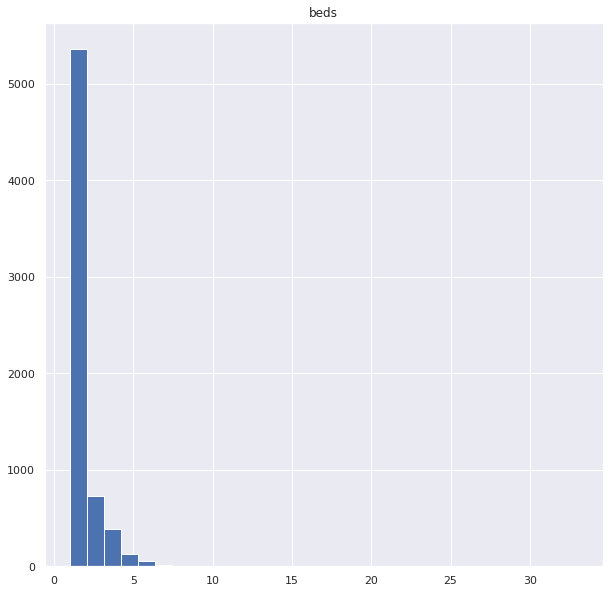

In [ ]:
# Numeric

col = 'beds'

print(f'Skośność: {df[col].skew()}')
print(f'Kurtoza: {df[col].kurt()}')
print(f'Histogram: {df.hist(col, bins=30)}')

Histogram:


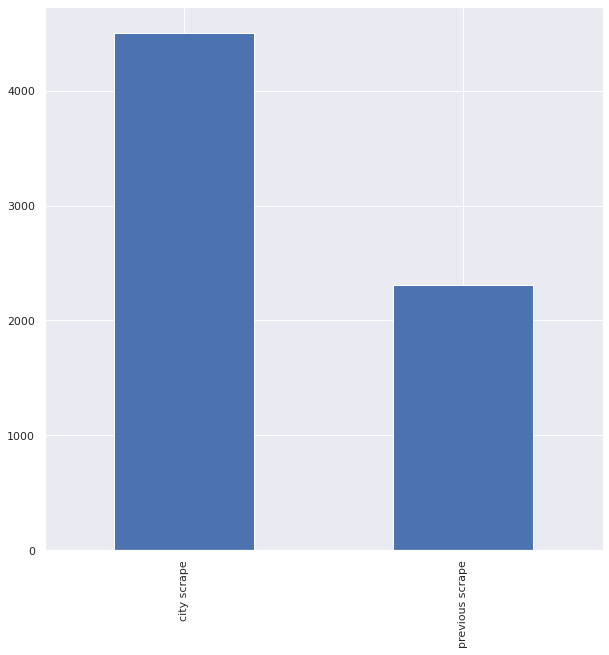

In [ ]:
# Category

col = 'source'

print('Histogram:')

df[col].value_counts().plot(kind='bar')

8. Przeprowadzenie czyszczenia danych

8. a) uzupełnienie brakujących danych (np. wartością stałą, średnią/medianą/modą dla całego zbioru lub dla podzbiorów według kategorii, poprzez interpolację itp.), usunięcie wierszy/kolumn, zawierających zbyt wiele braków danych

In [ ]:
def fillNullsByGivenValue(df, col, value):
  df[col].fillna(value, inplace=True)

def fillNullsByMode(df, col):
  mode = df[col].mode()[0]
  fillNullsByGivenValue(df, col, mode)

def fillNullsByMean(df, col):
  mean = df[col].mean()
  fillNullsByGivenValue(df, col, mean)

# Usunięcie pustych kolumn, wierszy raczej nie chcemy usuwać
df.dropna(how='all', axis=1, inplace=True)

# Booleans: możemy ustawić na false jeżeli brak wartości - jedyna kolumna typu bool, która posiada brakujące wartości to: host_is_superhost
fillNullsByGivenValue(df, 'host_is_superhost', False)

# Ustawienie losowego tekstu dla kolumn, które są puste (string)
fillNullsByGivenValue(df, 'description', 'No description provided')
fillNullsByGivenValue(df, 'neighborhood_overview', 'No neighborhood overview provided')
fillNullsByGivenValue(df, 'host_location', 'No host location provided')
fillNullsByGivenValue(df, 'host_about', 'No info about host provided')
fillNullsByGivenValue(df, 'host_response_time', 'within a day')
fillNullsByGivenValue(df, 'host_neighbourhood', 'No host neighbourhood provided')
fillNullsByGivenValue(df, 'neighbourhood', 'No neighbourhood provided')
fillNullsByGivenValue(df, 'license', 'No license provided')

# Możemy ustawić wartości używając 'mode' (najpopularniejsza wartość)
fillNullsByMode(df, 'bathrooms')
fillNullsByMode(df, 'bathrooms_text')
fillNullsByMode(df, 'bedrooms')
fillNullsByMode(df, 'beds')

# Wartości reviews (first_review, last_review, review_scores_rating itd.) - nie możemy uzupełnić, ponieważ wartości first/last_review to typ DateTime, nie byłoby to zgodne z prawdą
fillNullsByGivenValue(df, 'reviews_per_month', 0)

# Możemy ustawić wartości używając 'mean' (średnia) 
fillNullsByMean(df, 'host_response_rate')
fillNullsByMean(df, 'host_acceptance_rate')

df.isnull().sum()

id                                                0
listing_url                                       0
scrape_id                                         0
last_scraped                                      0
source                                            0
name                                              0
description                                       0
neighborhood_overview                             0
picture_url                                       0
host_id                                           0
host_url                                          0
host_name                                         0
host_since                                        0
host_location                                     0
host_about                                        0
host_response_time                                0
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_thumbna

8. b) Przycięcie odstających wartości - wykres pudełkowy, metoda z-score

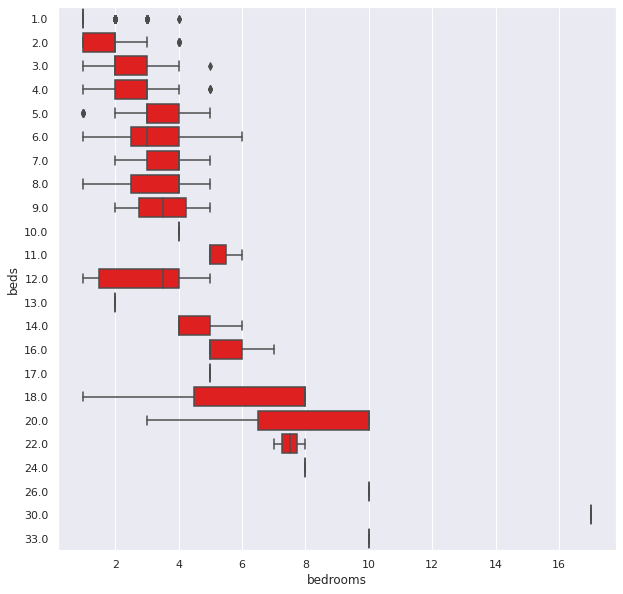

In [ ]:
# Wykres pudełkowy (Box Plot) na przykładzie x: beedroms, y: beds
# Możemy zauważyć że np. dla wartości 'beds' = 5 widzimy odstającą wartość w przedziale mniejszym niż liczba 'bedrooms' = 2
# bit.ly/3DnXzAT

sb.set(rc={'figure.figsize': (10,10)})
sb.boxplot(x="bedrooms", y="beds", data=df, orient='h', color='red')

In [ ]:
# Wynik z-score daje wyobrażenie o tym, jak daleko jest on od średniej wartości punktu danych
# Wzór: z = (x – μ) / σ
# x: wartość, μ: średnia, σ: odchylenie standardowe

z_score_const = -2

df_values = df.select_dtypes(include=np.number)
df_mean_values = df.mean(numeric_only=True)
df_std_values = df.std(numeric_only=True)

df_z_score = (df_values - df_mean_values) / df_std_values
df_for_delete = df[(df_z_score < z_score_const) | (df_z_score > abs(z_score_const))].dropna(thresh=1).index
df.drop(df_for_delete, inplace=True)

9. Zbadanie zależności pomiędzy zmiennymi – krok ten pozwoli odkryć związki pomiędzy poszczególnymi zmiennymi; informacje te mogą także zostać użyte, np. na etapie transformacji zmiennych lub do podjęcia decyzji, które zmienne wybrać do budowy model

9. a) macierz korelacji - Spearman

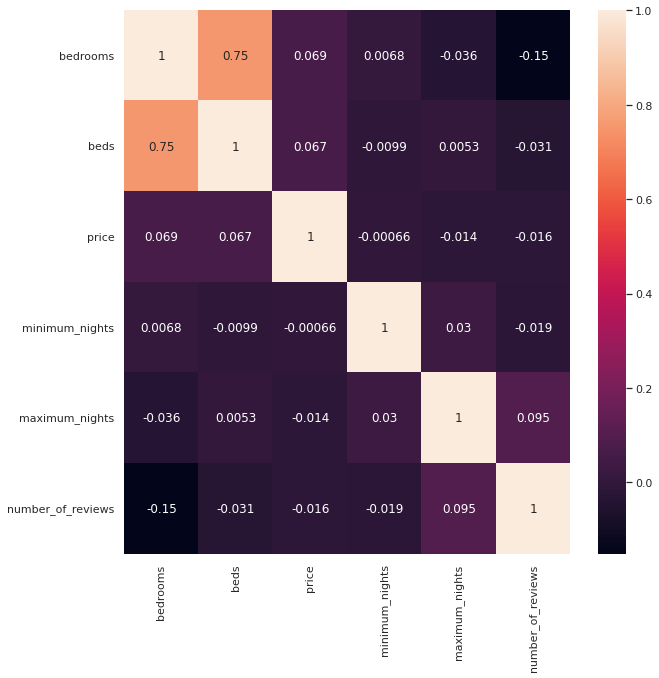

In [ ]:
# Możemy tutaj zauważyć:
# - liczba sypialni/łóżek posiada korelację z ceną, a np. opinia z ceną nie posiada
# - maksymalna liczba nocy koreluję z opiniami
# - itd.

col1 = 'bedrooms'
col2 = 'beds'
col3 = 'price'
col4 = 'minimum_nights'
col5 = 'maximum_nights'
col6 = 'number_of_reviews'

df_temp = pd.DataFrame({
    col1: df[col1], 
    col2: df[col2], 
    col3: df[col3], 
    col4: df[col4],
    col5: df[col5],
    col6: df[col6]
})
df_temp.corr(method = 'spearman')
sb.heatmap(df_temp.corr(), annot=True)

9. b) V Crammer

In [ ]:
# Kod pochodzący z wikipedii
# Wynik pomiędzy zmiennymi 'category' - 'source oraz 'room_type' wynosi 0.24, czyli występuje pewna korelacja

import scipy.stats as ss

def calculate_cramers_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

tab = pd.crosstab(df['source'], df['room_type'])

calculate_cramers_stat(tab)

0.24298479094799774

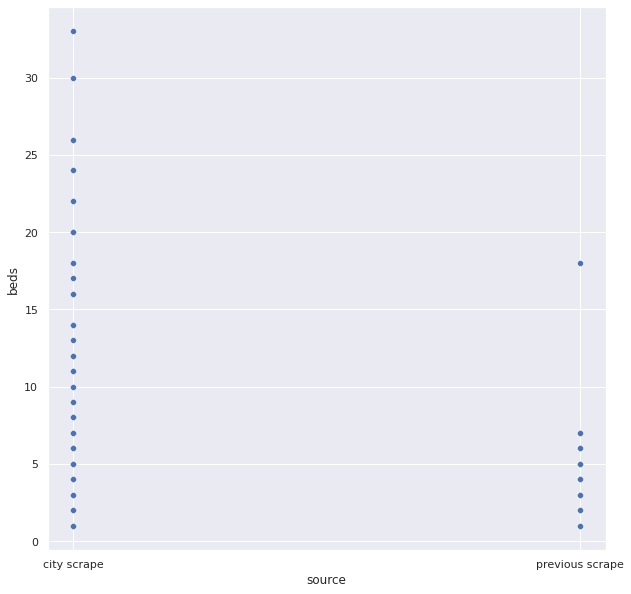

In [ ]:
# Zwizualizowanie korelacji pomiędzy zmienną 'category' (source), a zmienną 'numeric' (beds)

sb.scatterplot(x="source", y="beds", data=df)

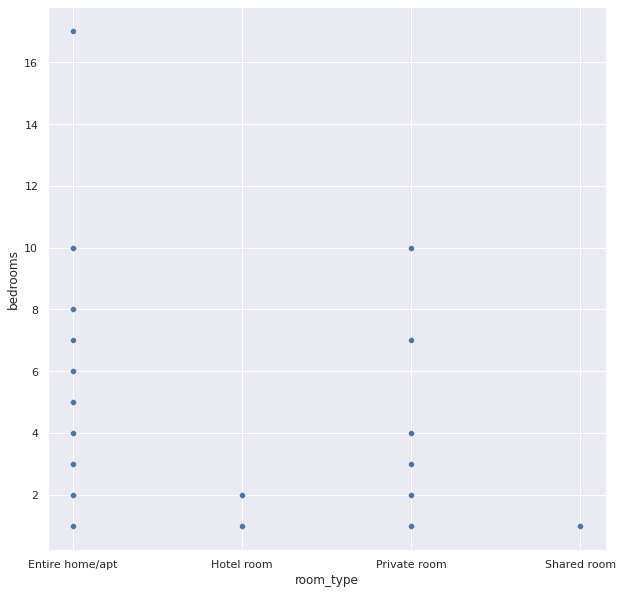

In [ ]:
# Zwizualizowanie korelacji pomiędzy zmienną 'category' (room_type), a zmienną 'numeric' (bedrooms)

sb.scatterplot(x="room_type", y="bedrooms", data=df)